<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch6_1~3pg_377~395(%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06 차원 축소

# 01 차원 축소의 개요
- 차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것. 
- 일반적으로 차원이 증가할스록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소한 구조를 가지게 됨
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어지고, 개별 피처간에 상관관계가 높을 가능성이 큼. 
- 회귀 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하
- 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다. 예) 수십개의 피처는 시각적으로 표현해 데이터 특성을 파악하기 불가능. -> 3차원 이하로 차원 축소를 해서 시각적으로 데이터를 압축해서 표현
- 또, 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다. 

# 차원 축소의 종류
- 피처 선택: 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터를 잘 나타내는 주요 피처만 선택하는 것 
- 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것 -> 기존 피처 압축된 것으로 기존 피처와는 완전히 다른 값이 됨
>  단순 압축이 아니라 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것. 예를 들어 더 함축적인 요약 특성으로 추출. 기존 피처가 인지하기 어려웠던 잠재적 요소를 추출하는 것. 따라서 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아님. 차원 축소 통해 데이터를 좀 더 잘 설명할 수 있는 잠재적 요소를 추출.

# 차원축소 알고리즘
PCA, SVD, NMF 등

# 02 PCA (Principal Component Analysis)

PCA 개요
- 대표적인 차원 축소 기법, 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화 됨
- 제일 먼저 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축 생성하고 두 번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 한다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 생성. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼 차원으로 원본데이터가 차원 축소
- 즉, 주성분 분석은 원본 데이터이 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법

# PCA를 선형대수 관점에서 해석
- 입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환
- 고유벡터가 PCA이 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값은 고유벡터의 크기를 나타내며, 동시에 입력 데이터 분산을 나타냄


즉, 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유 벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

# 붓꽃 데이터로 실습

In [32]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 DF로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# 시각화
- 각 품종에 따라 붓꽃 데이터 2차원으로 시각화

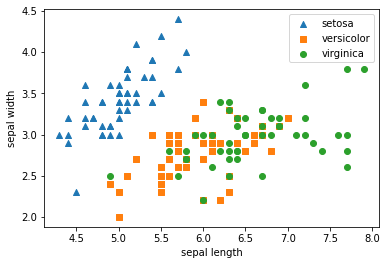

In [33]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 타깃 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# PCA를 바로 적용하기 전 개별 속성을 함께 스케일링
- 여러 속성을 PCA로 압축하기 전 속성값을 동일한 스케일로 변환

In [34]:
from sklearn.preprocessing import StandardScaler

# target 값을 제외한 모든 속성 값을 standardscaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:, :-1])

# 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원의 붓꽃 데이터를 2차원 PCA 데이터로 변환
- n_components: PCA로 변환할 차원의 수
- fit(입력 데이터 세트), transform(입력 데이터 세트)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit과 transform 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


# 넘파이 행렬을 데이터 프레임으로 변환한 뒤 데이터 값 확인 

In [36]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명.
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


# PCA 변환된 데이터 세트를 2차원상에서 시각화
- 붓꽃 품종 확인 

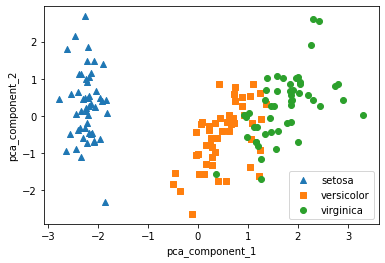

In [37]:

#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- 변환 후에도 setosa 품종은 명확히 구분 가능하고 나머지 두개는 겹치는 부분이 있으나 비교적 잘 구분. 
- pca 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문. 

# pca component 별로 원본 데이터의 변동성을 얼마나 잘 반영하고 있는지 확인 
- explained_variance_ratio_ 속성 이용.

In [38]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 pca 변환 요소인 pca_component_1이 전체 변동성의 72.9% 
- 두번째 pca_component_2가 22.8% 차지. 
>= 이렇게 두개로만 변환해도 원본 데이터의 변동성을 95% 설명

#  원본과 pca 변환된 데이터 세트 각각에 분류를 적용한 후 결과 비교


# 원본 붓꽃 데이터에 랜덤포레스트 적용

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


# 기존 4차원 데이터를 2차원으로 PCA 변환
- 데이터 세트에 랜덤 포레스트를 적용

In [40]:
pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- PCA 변환 차원 개수에 따라 예측 성능 떨어질 수 밖에 없음. 
- 붓꽃 데이터는 예측 성능의 정확도가 변환한 데이터가 원본 대비 10% 하락. 꽤 큰 성능 수치 감소지만 속성 개수는 50% 감소한 것을 고려하면 변환 후에도 원본 데이터 특성을 상당 부분 유지.


# 더 많은 피처를 가진 데이터 세트를 적은 pca 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 변환된 pca 데이터 세트에 기반해 비교
- 신용카드 고객 데이터 세트

In [41]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/ESAA/필사/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# header로 의미없는 첫 행 제거,  iloc로 기존 id제거
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/ESAA/필사/credit_card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

ImportError: ignored

# 데이터 전처리
- 타킷: default payment next month
- 연체일 경우 1, 정상납부가 0. 
- 원본 데이터에 pay_0 다음에 pay_2 칼럼이 있으므로 pay_0 칼럼을 pay_1로 칼럼명 변환하고 default payment next month 칼럼도 칼럼명 너무 길어서 default로 칼럼명 변경. 
- 타깃 속성인 칼럼을 y_target 변수로 별도 저장하고 피처 데이터는 이 칼럼 제외

In [ ]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target=df['default']
X_features=df.drop('default', axis=1)

# 시각화
- 23개의 속성 데이터 세트 있지만, 속성끼리 상관도 매우 높음. 속성 간 상관도 구한 뒤 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- bill_amt1~bill_amt6의 6개 속성끼리 상관도가 대부분 0.9 이상. 
- pay_1부터 pay_6끼리도 높다. 
- pca만으로도 자연스럽게 이 속성들의 변동성 수용 가능. 

# bill_amt 6개를 2개 컴포넌트로 pca 변환하고 개별 컴포넌트 변동성 확인

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Bill_amt1부터 6까지 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

- 단 두개의 pca 컴포넌트만으로도 6개 속성의 변동성을 약 95%이상 설명가능.
- 

# 원본 데이터 세트와 6개 컴포넌트로 pca 변환한 데이터 세트의 분류 예측 결과를 상호 비교
- 랜덤포레스트 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

- 3개의 교차 검증 세트에서 평균 예측 정확도는 81.71%.

# 6개의 컴포넌트로 pca 변환

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_scre()로 분류 예측 수행.
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:4f}'.format(np.mean(scores_pca)))

# 03 LDA(Linear Discriminant Analysis)

# LDA 개요
- 선형 판별 분석법. 
- 입력 데이터를 저차원 공간에 투영해 차원을 축소하는 기법. 
- 차이점: lda는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기분을 최대한 유지하며 차원 축소, pca는 입력 데이터의 변동성의 가장 큰 축을 찾았지만 lda는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음.


- 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소. 클래스 간 분산은 크게, 클래스 내 분산은 최대한 작게 가져간다.

1. 클래스 내부와 클래스 간 분산 행렬 구한다. 이 두 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.
2. 클래스 내부 분산 행렬과 클래스 간 분산 행렬로 고유벡터로 분해.
3. 고유값이 가장 큰 순으로 K개 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

# 붓꽃 데이터 세트에 적용

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

# 2개 컴포넌트로 lda 변환
- 유의할 점: lda는 지도학습이므로, 클래스의 결정 값이 변환 시에 필요. 
- lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됨

In [45]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


# lda 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

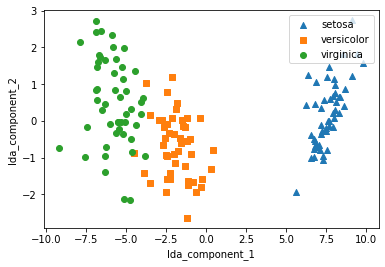

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

#setosa 타깃 값은 0, versicolor는 1, virginica는 2, 각 타깃 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()